In [16]:
## Análisis de la Deserción de Clientes en una Cartera de Tarjetas de Crédito
#Esta notebook analiza un dataset de clientes de tarjetas de crédito para identificar factores que influyen en la deserción de clientes (churn). Utilizaremos técnicas de análisis de datos y visualización para obtener insights valiosos.

## Abstract
#El presente estudio tiene como objetivo analizar los factores que influyen en la deserción de clientes en una cartera de tarjetas de crédito. Utilizando un dataset de clientes, se realizará un análisis de datos para identificar patrones y tendencias que pueden predecir la probabilidad de churn. Se utilizarán técnicas de visualización para representar gráficamente la distribución de variables clave y su relación con la deserción. Las hipótesis principales incluyen que los clientes con mayor inactividad y menor número de transacciones tienen una mayor probabilidad de churn. Los resultados de este análisis proporcionarán una comprensión más profunda de los factores críticos que influyen en la lealtad del cliente y ayudarán a desarrollar estrategias para retener a los clientes.

## ## Preguntas e Hipótesis

### Preguntas
#1. ¿Qué características de los clientes están más asociadas con la deserción?
#2. ¿Cómo influyen la inactividad y el número de contactos en la probabilidad de churn?
#3. ¿Existen patrones específicos en el uso de la tarjeta que indiquen una mayor probabilidad de churn?

### Hipótesis
#1. Los clientes con un mayor número de meses inactivos en los últimos 12 meses tienen una mayor probabilidad de churn.
#2. Los clientes que han tenido más contactos con la entidad financiera en los últimos 12 meses son más propensos a abandonar.
#3. Un menor número del monto total de transacciones y una menor cantidad de transacciones en el último trimestre en comparación con el trimestre anterior están asociados con una mayor probabilidad de churn.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset especificando el delimitador (ajústalo según sea necesario)
dataset1 = pd.read_csv(r'C:\Users\n27633\Desktop\CODERHOUSE\BankChurners.csv', delimiter=',')

# Mostrar las primeras filas del dataset
print(dataset1.head())

#El dataset posee distintas variables de clientes bancarios, el objetivo es analizar la posibilidad de abandono de los mismso
#Las variables potencialmente relevantes serian: Months_Inactive_12_mon, dado que la inactividad es un fuerte indicador de deserción inminente.
#Otras variables interesantes en ese sentido, Cantidad de Contactos en los ultimos 12 meses, Monto y Cantidad de Transacciones, como asi tambien algun cambio significativo de comportamiento en el ultimo tiempo.




   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1       

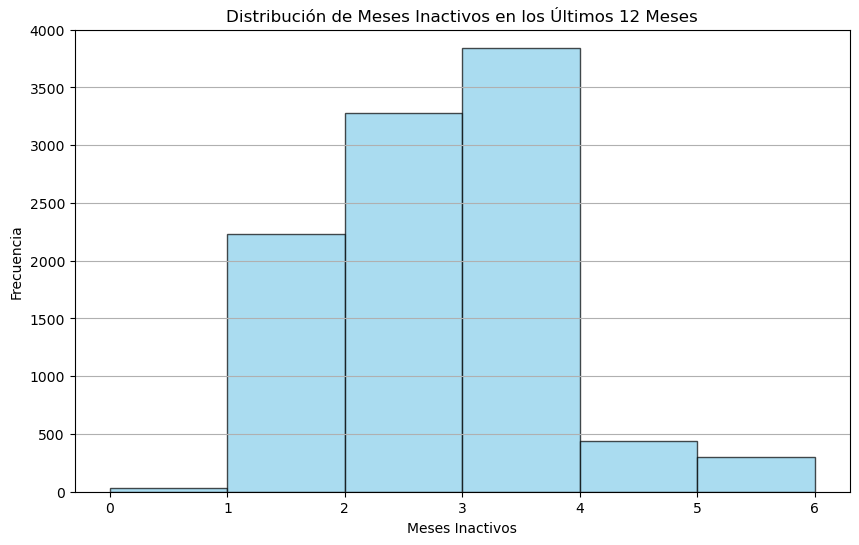

In [8]:
#Histograma de Months_Inactive_12_mon
import matplotlib.pyplot as plt

# Ajustar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Generar el histograma
plt.hist(dataset1['Months_Inactive_12_mon'], bins=range(0, 7), edgecolor='k', alpha=0.7, color='skyblue')

# Agregar títulos y etiquetas
plt.title('Distribución de Meses Inactivos en los Últimos 12 Meses')
plt.xlabel('Meses Inactivos')
plt.ylabel('Frecuencia')

# Ajustar el rango del eje Y para mejorar la visualización
plt.ylim(0, 4000)

# Agregar una cuadrícula para mejorar la legibilidad
plt.grid(axis='y')

# Mostrar el gráfico
plt.show()



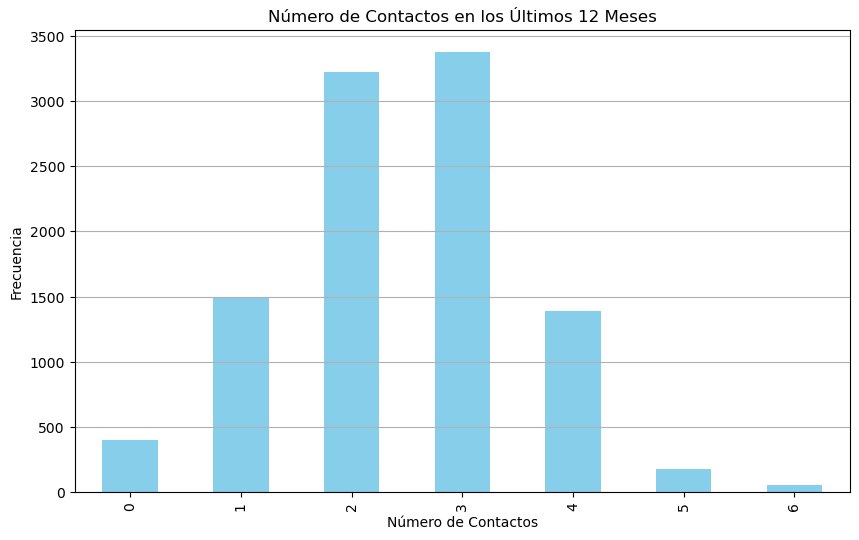

In [9]:
#Gráfico de barras de Contacts_Count_12_mon
plt.figure(figsize=(10, 6))
dataset1['Contacts_Count_12_mon'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Número de Contactos en los Últimos 12 Meses')
plt.xlabel('Número de Contactos')
plt.ylabel('Frecuencia')
plt.grid(axis='y')
plt.show()


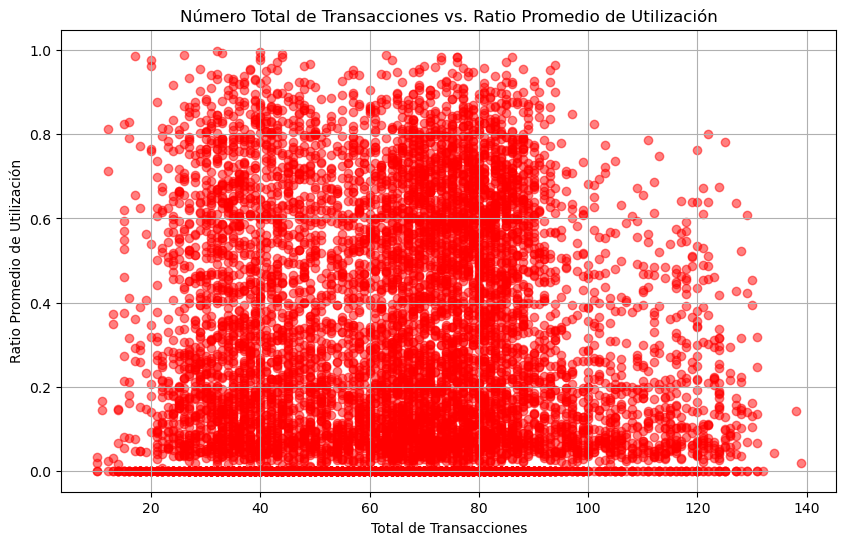

In [12]:
#Gráfico de dispersión de Total_Trans_Ct vs. Avg_Utilization_Ratio
plt.figure(figsize=(10, 6))
plt.scatter(dataset1['Total_Trans_Ct'], dataset1['Avg_Utilization_Ratio'], alpha=0.5, c='red')
plt.title('Número Total de Transacciones vs. Ratio Promedio de Utilización')
plt.xlabel('Total de Transacciones')
plt.ylabel('Ratio Promedio de Utilización')
plt.grid(True)
plt.show()


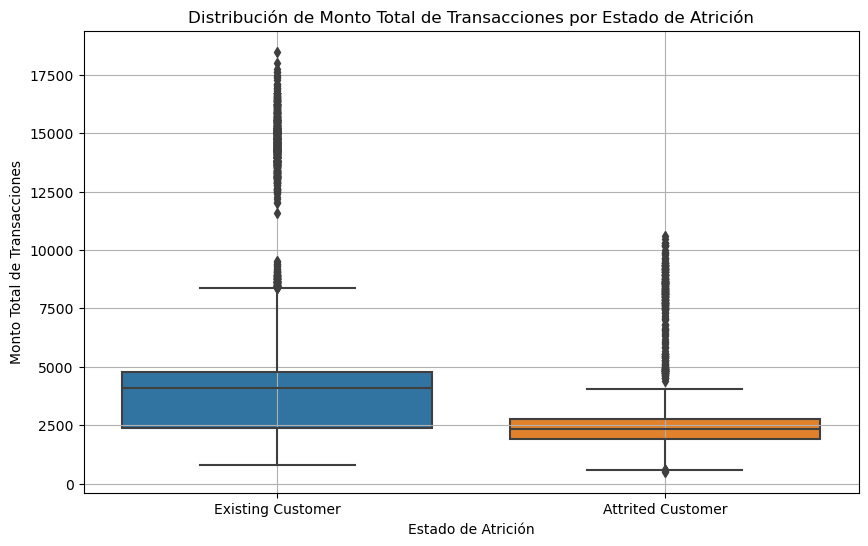

In [13]:
#Gráfico de caja de Total_Trans_Amt
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition_Flag', y='Total_Trans_Amt', data=dataset1)
plt.title('Distribución de Monto Total de Transacciones por Estado de Atrición')
plt.xlabel('Estado de Atrición')
plt.ylabel('Monto Total de Transacciones')
plt.grid(True)
plt.show()



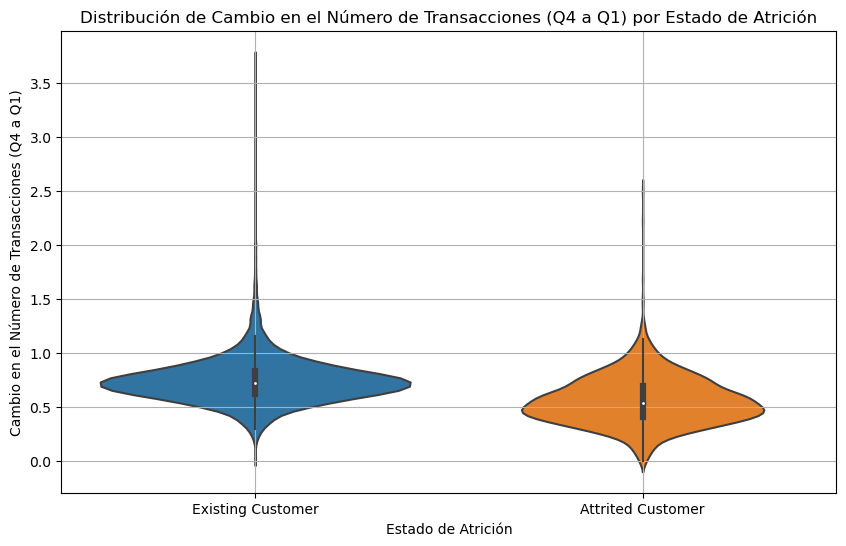

In [14]:
#Gráfico de violín de Total_Ct_Chng_Q4_Q1
plt.figure(figsize=(10, 6))
sns.violinplot(x='Attrition_Flag', y='Total_Ct_Chng_Q4_Q1', data=dataset1)
plt.title('Distribución de Cambio en el Número de Transacciones (Q4 a Q1) por Estado de Atrición')
plt.xlabel('Estado de Atrición')
plt.ylabel('Cambio en el Número de Transacciones (Q4 a Q1)')
plt.grid(True)
plt.show()


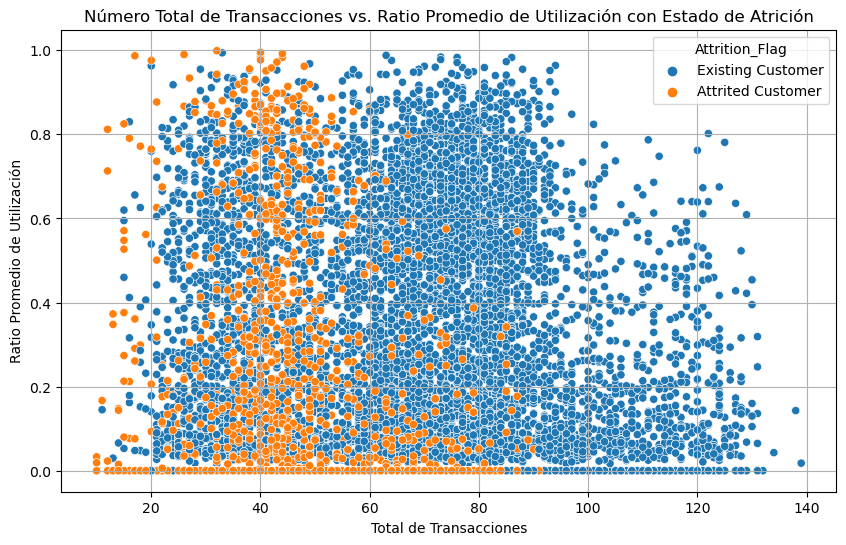

In [15]:
#Gráfico de dispersión con hue en Avg_Utilization_Ratio
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_Trans_Ct', y='Avg_Utilization_Ratio', hue='Attrition_Flag', data=dataset1)
plt.title('Número Total de Transacciones vs. Ratio Promedio de Utilización con Estado de Atrición')
plt.xlabel('Total de Transacciones')
plt.ylabel('Ratio Promedio de Utilización')
plt.grid(True)
plt.show()


In [18]:
## Interpretación de Resultados

### Histograma de `Months_Inactive_12_mon`
#La mayoría de los clientes han estado inactivos entre 1 y 3 meses en los últimos 12 meses. Esto indica que la inactividad es un factor común entre los clientes que podrían estar en riesgo de churn.

### Gráfico de dispersión de `Total_Trans_Ct` vs. `Avg_Utilization_Ratio` con `hue`
#El gráfico muestra que los clientes que han abandonado (churn) tienen diferentes patrones en la relación entre el número total de transacciones y el ratio de utilización en comparación con los que no han abandonado. Los clientes con un ratio de utilización más alto y menos transacciones parecen estar más en riesgo.

### Gráfico de caja de `Total_Trans_Amt` por `Attrition_Flag`
#La distribución del monto total de transacciones muestra que los clientes que han abandonado tienden a tener menores montos de transacciones en comparación con los que no han abandonado, lo que sugiere que una menor actividad financiera puede estar asociada con una mayor probabilidad de churn.
